## What is Datashader?

**Datashader turns even the largest datasets into images, faithfully preserving the data's distribution.**

Datashader is an [open-source](https://github.com/bokeh/datashader/) Python 2 and 3 library for analyzing and visualizing large datasets. Specifically, datashader is designed to "rasterize" or "aggregate" datasets into regular grids that can be viewed as images, making it simple and quick to see the properties and patterns of your data. Datashader can plot a billion points in a second or so on a 16GB laptop, and scales up easily to out-of-core or distributed processing for even larger datasets.

This page of the getting-started guide will give a simple example to show how it works, and the following page will show how to use Datashader as a standalone library for generating arrays or images directly
([2-Pipeline](2-Pipeline.ipynb)).  Next we'll show how to use Datashader as a component in a larger visualization system like [HoloViews](http://holoviews.org) or [Bokeh](http://bokeh.pydata.org) that provides interactive plots with dynamic zooming, labeled axes, and overlays and layouts ([3-Interactivity](3-Interactivity.ipynb)).  More detailed information about each topic is then provided in the [User Guide](../user_guide/).

## Example: NYC taxi trips

To illustrate how this process works, we will demonstrate some of the key features of Datashader using a standard "big-data" example: millions of taxi trips from New York City, USA.  First let's import the libraries we are going to use and then read the dataset.

In [3]:
import datashader as ds
import pandas as pd
from colorcet import fire
from datashader import transfer_functions as tf

df = pd.read_csv('../data/nyc_taxi.csv', usecols=['dropoff_x', 'dropoff_y'])
df.tail()


dropoff_x     dropoff_y
10679302 -8.232492e+06  4.979234e+06
10679303 -8.234857e+06  4.971131e+06
10679304 -8.234203e+06  4.981092e+06
10679305 -8.235618e+06  4.973722e+06
10679306 -8.234152e+06  4.977120e+06

Here you can see that we have a variety of columns with data about each of the 10 million taxi trips here, such as the locations in Web Mercator coordinates, the distance, etc.  With datashader, we can choose what we want to plot on the `x` and `y` axes and see the full data immediately, with no parameter tweaking, magic numbers, subsampling, or approximation, up to the resolution of the display:

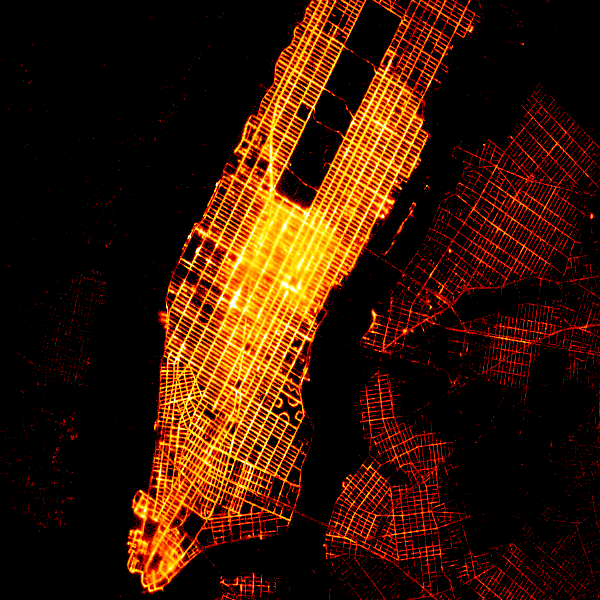

In [4]:
agg = ds.Canvas().points(df, 'dropoff_x', 'dropoff_y')
tf.set_background(tf.shade(agg, cmap=fire),"black")

Here you can immediately see that the data points are aligned to a street grid, that some areas have much more traffic than others, and that the quality of the signal varies spatially (with some areas having blurry patterns that indicate GPS errors, perhaps due to tall buildings). Getting a plot like this with other approaches would take quite a bit of time and effort, but with datashader it appears in milliseconds without trial and error.

The output above is just a bare image, which is all that datashader knows how to generate directly.  But datashader can integrate closely with Bokeh, HoloViews, and GeoViews, which makes it simple to allow interactive zooming, axis labeling, overlays and layouts, and complex web apps.  For example, making a zoomable interactive overlay on a geographic map requires just a few more lines of code:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
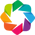

CPU times: user 1.66 ms, sys: 357 µs, total: 2.01 ms
Wall time: 1.73 ms


:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [dropoff_x,dropoff_y]   (R,G,B,A)

In [8]:
import holoviews as hv
from holoviews.element import tiles
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'
tile_opts  = dict(width=1000,height=600,xaxis=None,yaxis=None,bgcolor='black',show_grid=False)
map_tiles  = tiles.EsriImagery().opts(style=dict(alpha=0.5), plot=tile_opts)
points     = hv.Points(df, ['dropoff_x', 'dropoff_y'])
%time taxi_trips = datashade(points, x_sampling=1, y_sampling=1, cmap=fire, width=1000, height=600)

map_tiles * taxi_trips

You can select the "Wheel Zoom" tool on the right and then do panning and zooming (with the scroll bar).  The maps will update as you zoom, but the datashaded image will only update if you have a live Python process running. If you do have Python "live", each time you zoom in, the data will be re-aggregated at the new zoom level, converted to an image, and displayed embedded on the map data, making it simple to explore and understand the data.

At the most basic level, Datashader can accept scatterplot points (as above), line segments (for time series and trajectories), and rasters, and can turn each of these into a regularly sampled array or the corresponding pixel-based image.  The rest of this getting-started guide shows how to go from your data to either images or interactive plots, as simply as possible. The next [getting-started section](2_Pipeline.ipynb) breaks down each of the steps taken by datashader, using a synthetic dataset so that you can see precisely how the data relates to the images. The [user guide](../user_guide/) then explains each of the steps in much more detail.